# Chapter 3: Linear Regression - Applied Exercises

## Exercise 3.8:
This question involves the use of simple linear regression on the Auto data set.

(a) Use the sm.OLS() function to perform a simple linear regression with mpg as the response and horsepower as the predictor. Use the summarize() function to print the results. Comment on the output. For example:

i. Is there a relationship between the predictor and the response?

ii. How strong is the relationship between the predictor and the response?

iii. Is the relationship between the predictor and the response positive or negative?

iv. What is the predicted mpg associated with a horsepower of 98? What are the associated 95 % confidence and prediction intervals?

### Answer:

i.

In [2]:
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [3]:
auto_df = pd.read_csv('../Chapter_02/data/Auto.csv')
auto_df.drop(auto_df[auto_df['horsepower']=='?'].index, inplace=True)
auto_df['horsepower'] = auto_df['horsepower'].astype(int)

In [4]:
pred = auto_df['horsepower'].astype('int64')
res = auto_df['mpg'].astype('int64')
pred = sm.add_constant(pred)

In [5]:
model = sm.OLS(res, pred)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     603.6
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           3.27e-81
Time:                        10:28:36   Log-Likelihood:                -1174.9
No. Observations:                 392   AIC:                             2354.
Df Residuals:                     390   BIC:                             2362.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.6690      0.711     55.819      0.000      38.272      41.066
horsepower    -0.1568      0.006    -24.568      0.000      -0.169      -0.144
==============================================================================
Omnibus:                       16.642   Durbin-Watson:                   0.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.551
Skew:                           0.499   Prob(JB):                     0.000154
Kurtosis:                       3.283   Cond. No.                         322.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Based on the p-value of horsepower (<0.05) we can assume that it has a significant relationship with mpg.

ii. Based on the absolute value of horsepower's coefficient (<1) we can say that changes of horsepower wil cause small variation in mpg so their correlation is not strong.

iii. The coefficient of predictor hold a negative value, hence they have negative relationship.

iv.


In [6]:
prediction_obj = result.get_prediction((1,98))
prediction = prediction_obj.predicted_mean.round(2)
conf_int = prediction_obj.conf_int(alpha=0.05).round(2)
pred_int = prediction_obj.conf_int(obs=True, alpha=0.05).round(2)

In [7]:
print(f"The Prediction mean for 98 horsepower is {prediction} with 95% confidence interval of {conf_int} and prediction interval of {pred_int}")

The Prediction mean for 98 horsepower is [24.3] with 95% confidence interval of [[23.81 24.79]] and prediction interval of [[14.73 33.86]]


(b) Plot the response and the predictor in a new set of axes ax. Use the ax.axline() method or the abline() function defined in the lab to display the least squares regression line.

### Answer:

In [8]:
import matplotlib.pyplot as plt 

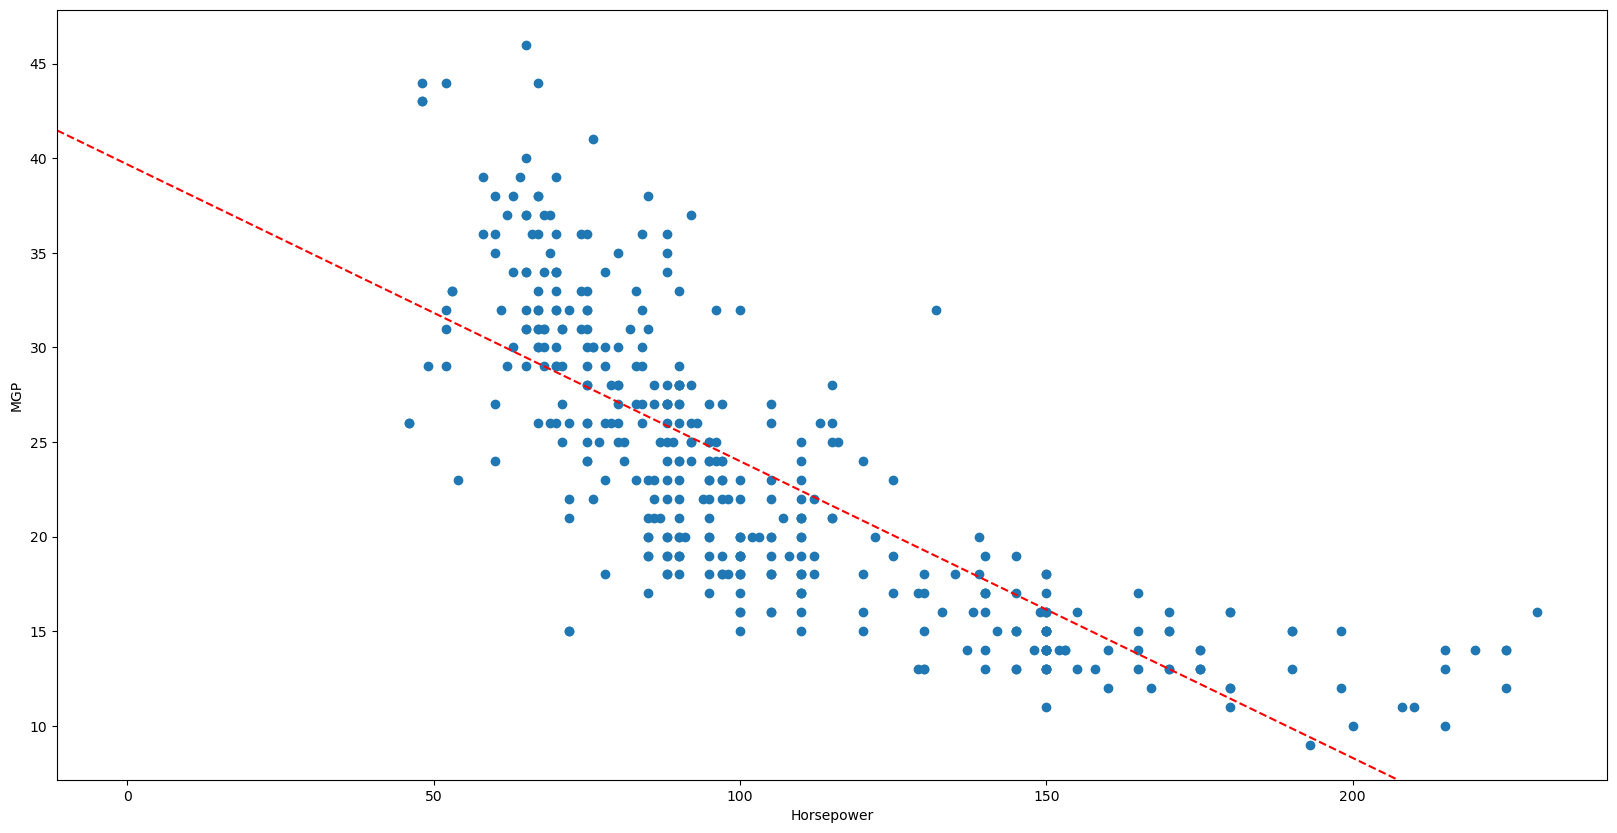

In [9]:
fig, ax =plt.subplots(figsize=(20,10))
ax.scatter(pred.iloc[:, 1], res)
xlim = ax.get_xlim()
ylim = [result.params.iloc[1] * xlim[0] + result.params.iloc[0], 
        result.params.iloc[1] * xlim[1] + result.params.iloc[0]]
ax.axline((0, result.params.iloc[0]),
          slope=result.params.iloc[1],
          color='red',
          ls='--')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MGP')
plt.show()

(c) Produce some of diagnostic plots of the least squares regression fit as described in the lab. Comment on any problems you see with the fit.

### Answer:

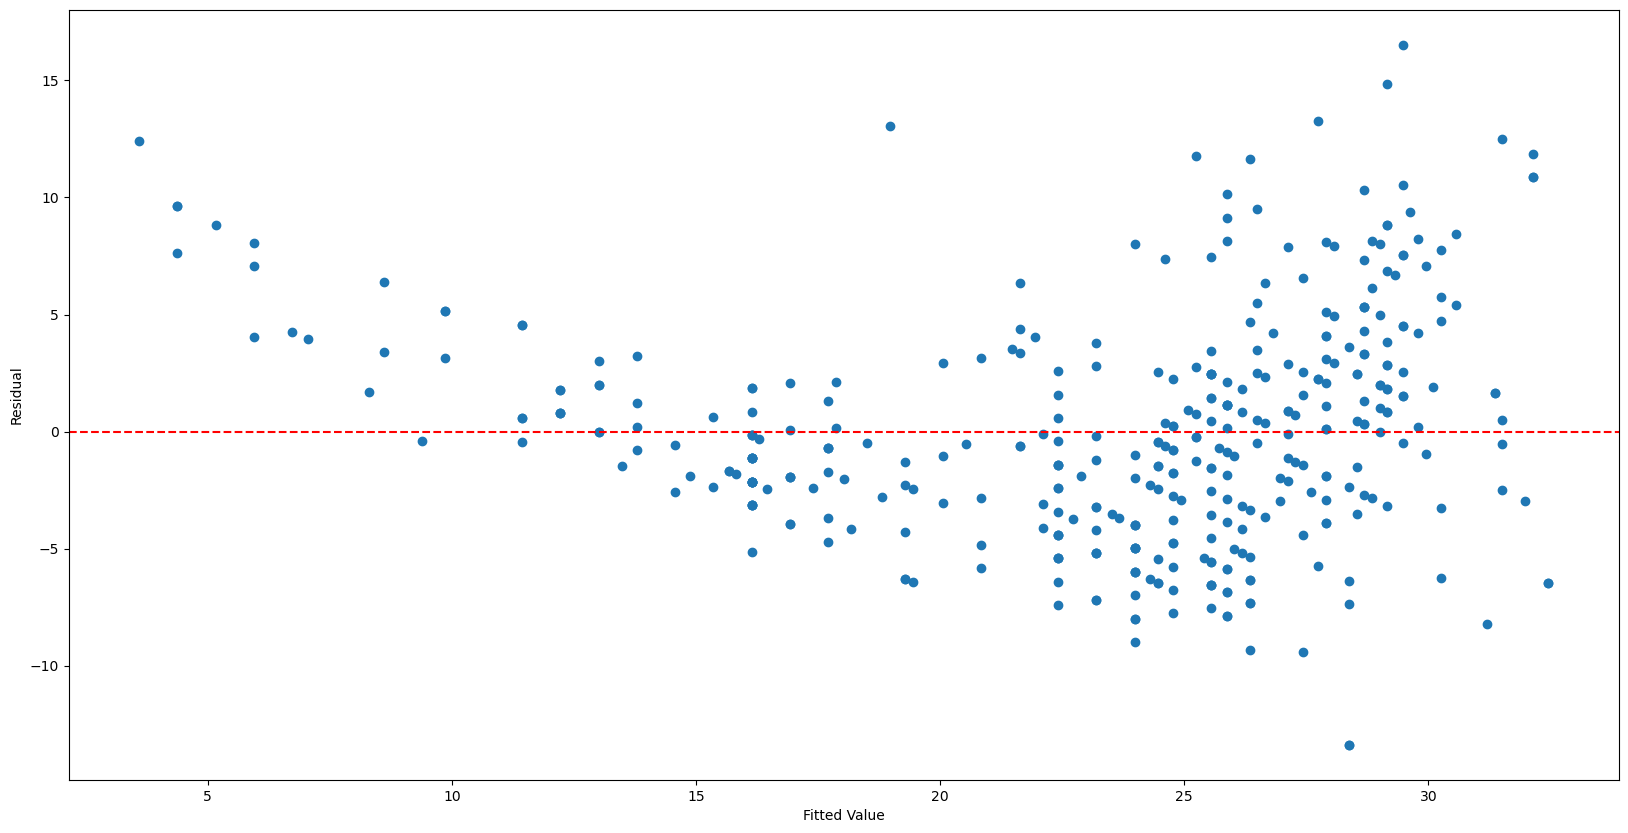

In [10]:
fig, ax =plt.subplots(figsize=(20,10))
ax.scatter(result.fittedvalues, result.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='red', ls='--')

No relationship can be determined through the residual plot.

Text(0, 0.5, 'Leverage')

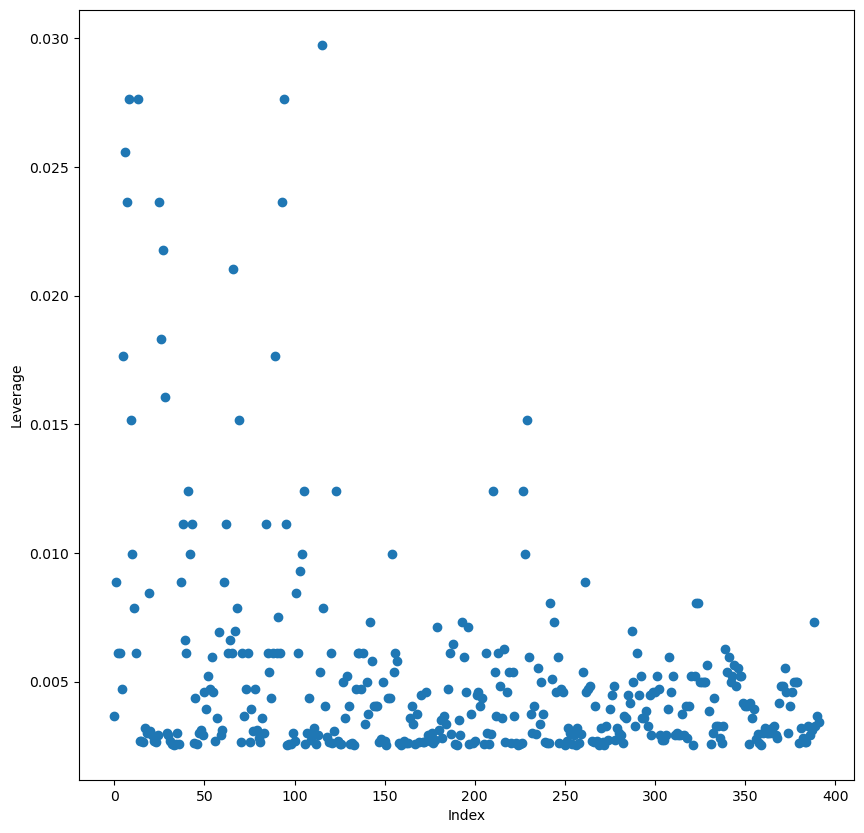

In [11]:
infl = result.get_influence()
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(np.arange(pred.shape[0]), infl.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')

Since all the predictor's leverage score is lower than (p+1)/n (0.005), we assume that we do not have an observation with high leverage.

---

## Exercise 3.9:

This question involves the use of multiple linear regression on the Auto data set.

(a) Produce a scatterplot matrix which includes all of the variables in the data set.

array([[<Axes: xlabel='mpg', ylabel='mpg'>,
        <Axes: xlabel='cylinders', ylabel='mpg'>,
        <Axes: xlabel='displacement', ylabel='mpg'>,
        <Axes: xlabel='horsepower', ylabel='mpg'>,
        <Axes: xlabel='weight', ylabel='mpg'>,
        <Axes: xlabel='acceleration', ylabel='mpg'>,
        <Axes: xlabel='year', ylabel='mpg'>,
        <Axes: xlabel='origin', ylabel='mpg'>],
       [<Axes: xlabel='mpg', ylabel='cylinders'>,
        <Axes: xlabel='cylinders', ylabel='cylinders'>,
        <Axes: xlabel='displacement', ylabel='cylinders'>,
        <Axes: xlabel='horsepower', ylabel='cylinders'>,
        <Axes: xlabel='weight', ylabel='cylinders'>,
        <Axes: xlabel='acceleration', ylabel='cylinders'>,
        <Axes: xlabel='year', ylabel='cylinders'>,
        <Axes: xlabel='origin', ylabel='cylinders'>],
       [<Axes: xlabel='mpg', ylabel='displacement'>,
        <Axes: xlabel='cylinders', ylabel='displacement'>,
        <Axes: xlabel='displacement', ylabel='displacement

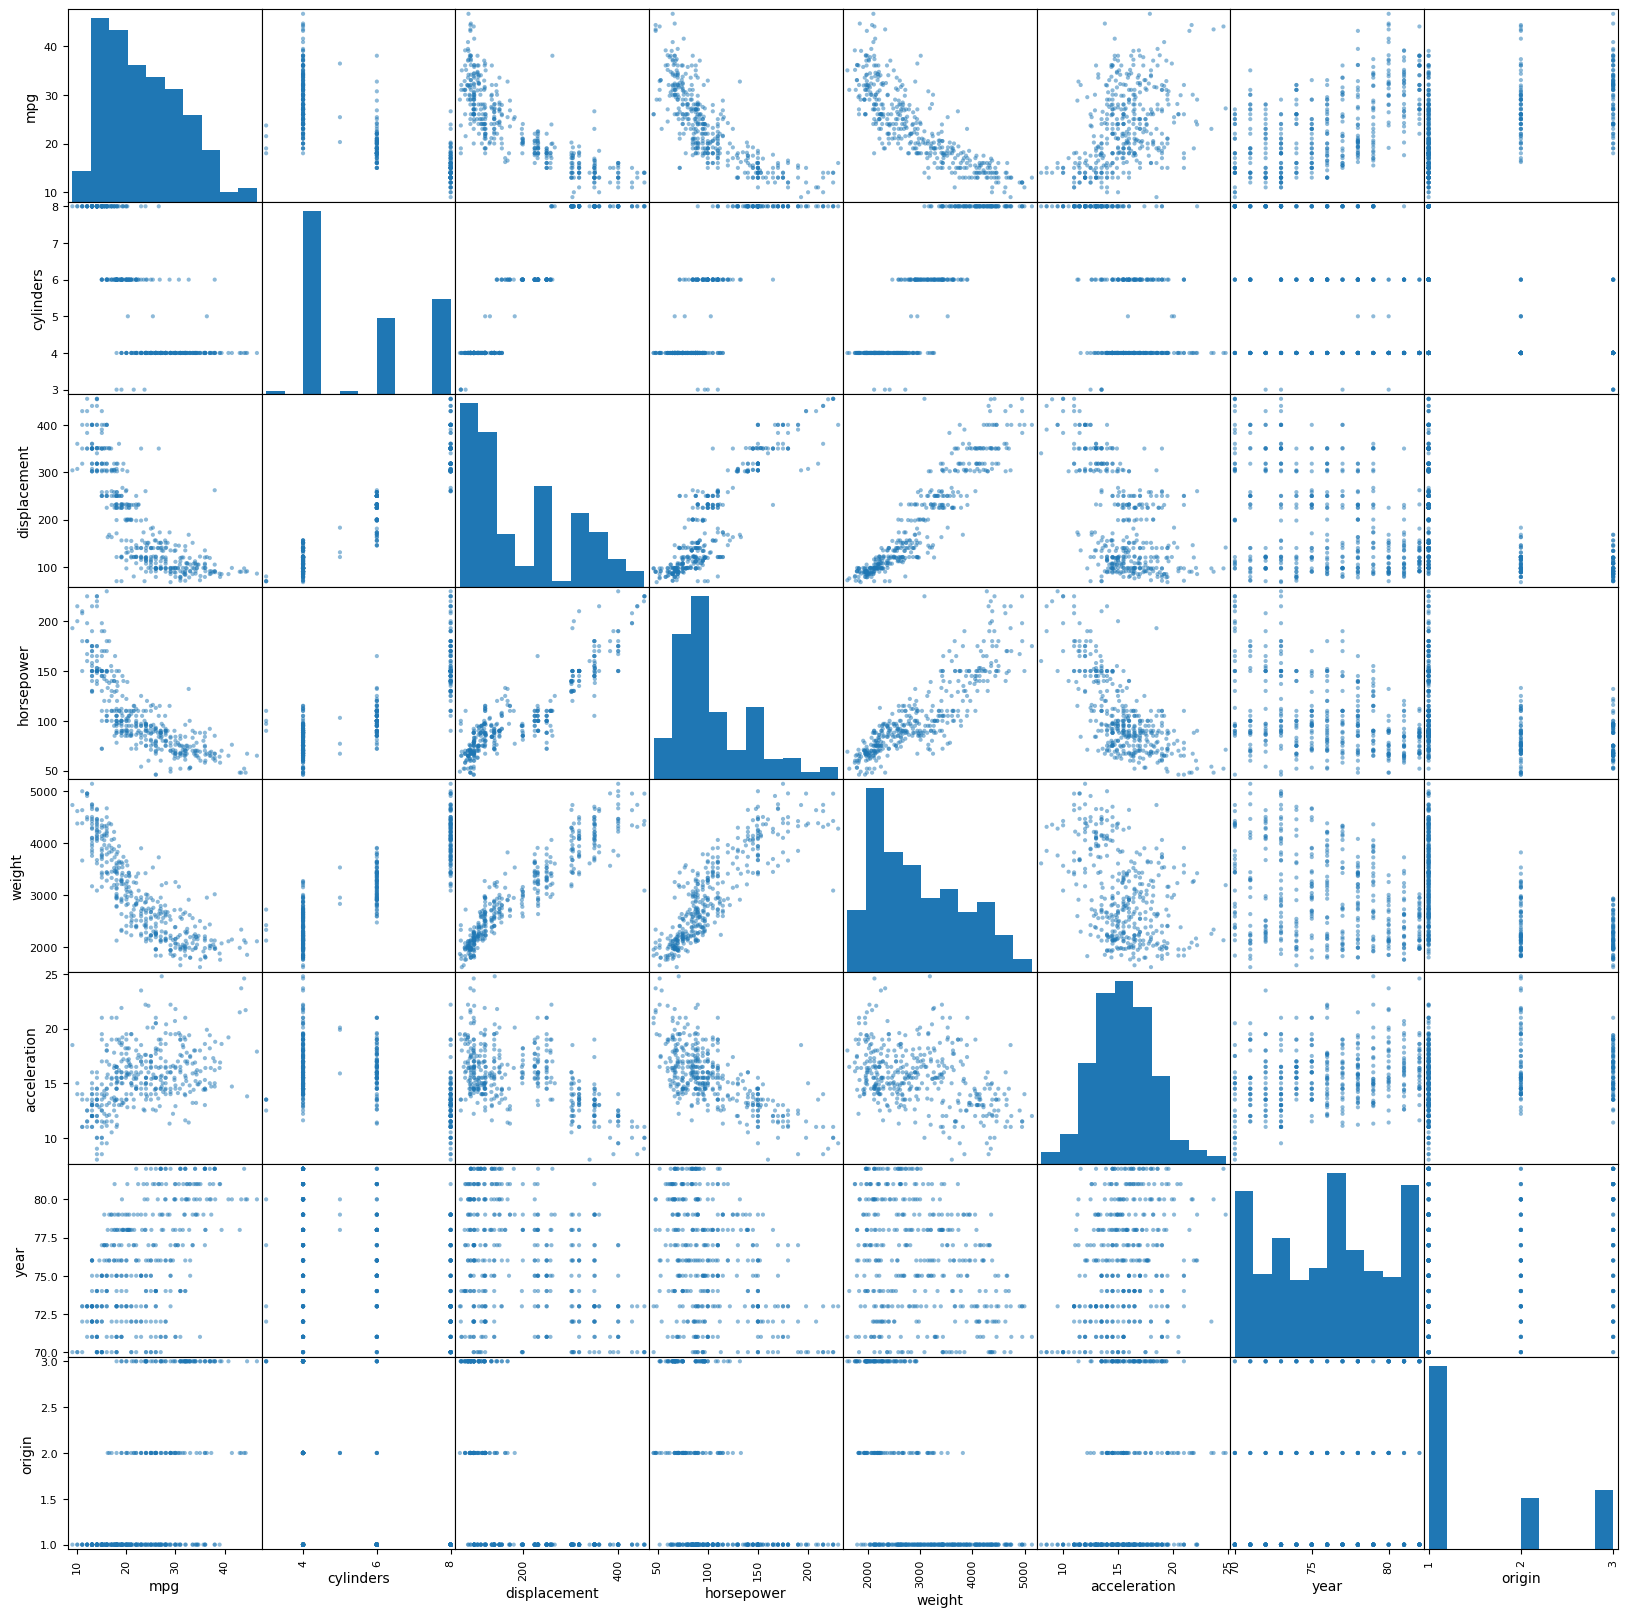

In [12]:
pd.plotting.scatter_matrix(auto_df ,figsize=(20, 20))

(b) Compute the matrix of correlations between the variables using the DataFrame.corr() method.

### Answer:

In [13]:
del auto_df['name']

<Axes: >

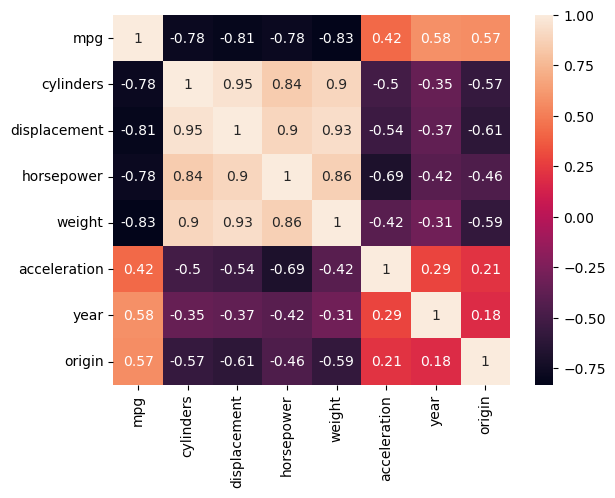

In [14]:
import seaborn as sns

corr = auto_df.corr()
sns.heatmap(corr, annot=True)

(c) Use the sm.OLS() function to perform a multiple linear regression with mpg as the response and all other variables except name as the predictors. Use the summarize() function to print the results. Comment on the outputFor instance:

i. Is there a relationship between the predictors and the response? Use the anova_lm() function from statsmodels to answer this question.

ii. Which predictors appear to have a statistically significant relationship to the response?

iii. What does the coefficient for the year variable suggest?

### Answer:

In [15]:
X = sm.add_constant(auto_df.iloc[:, 1:])
y = auto_df.iloc[:, 0]

In [16]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          2.04e-139
Time:                        10:28:38   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707      0.000     -26.350      -8.087
cylinders       -0.4934      0.323     -1.526      0.128      -1.129       0.142
displacement     0.0199      0.008      2.647      0.008       0.005       0.035
horsepower      -0.0170      0.014     -1.230      0.220      -0.044       0.010
weight          -0.0065      0.001     -9.929      0.000      -0.008      -0.005
acceleration     0.0806      0.099      0.815      0.415      -0.114       0.275
year             0.7508      0.051     14.729      0.000       0.651       0.851
origin           1.4261      0.278      5.127      0.000       0.879       1.973
==============================================================================
Omnibus:                       31.906   Durbin-Watson:                   1.309
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.100
Skew:                           0.529   Prob(JB):                     2.95e-12
Kurtosis:                       4.460   Cond. No.                     8.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

i. The F-statistic of the results are much higher than one and so we reject the null hypothesis that says non of the predictors have relationship with the response variable.

ii. By looking at the p-value of each predictors, we can assume that displacement, weight, year and origin have a significant impact on the target value.

iii. The coefficient of year suggests that each year that is added, mpg increase for nearly 0.75, if all other predictors are constant.

(d) Produce some of diagnostic plots of the linear regression fit as described in the lab. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?

### Residual Plot

Text(0, 0.5, 'Residul')

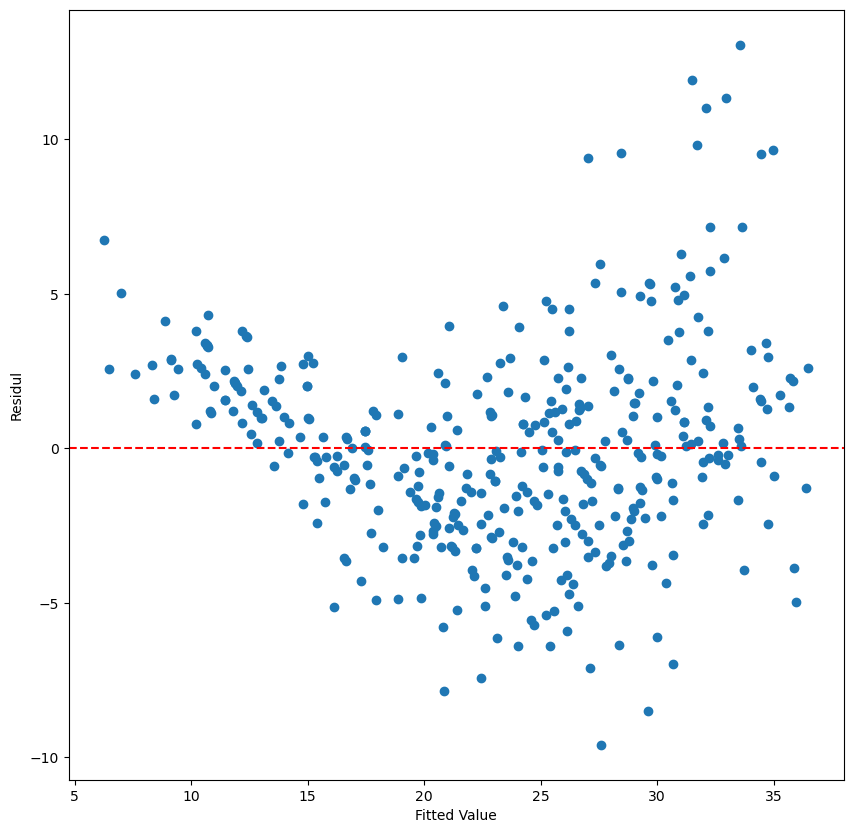

In [17]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(results.fittedvalues, results.resid)
ax.axhline(0, color='red', ls='--')
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residul')

In the residual plot we can detect a U shape pattern meaning that there might be some non-linear relationship between predictor and target variable.

Studentized Residual

322

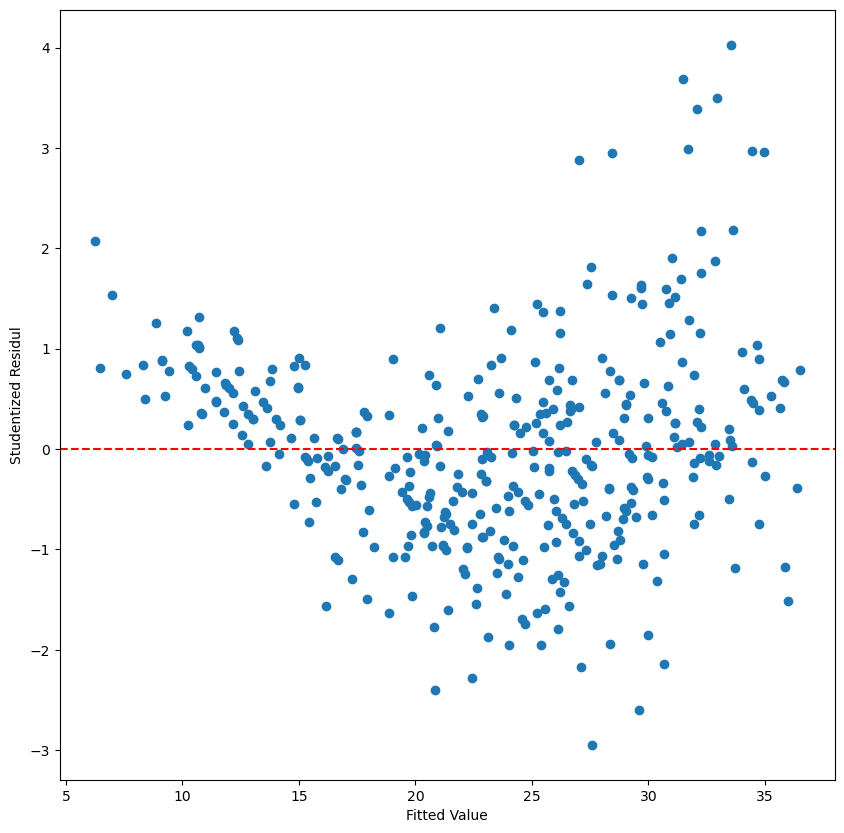

In [18]:
fig, ax = plt.subplots(figsize=(10, 10))
studentized_resid = results.outlier_test().iloc[:, 0]
ax.scatter(results.fittedvalues, studentized_resid)
ax.axhline(0, color='red', ls='--')
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Studentized Residul')
results.outlier_test().iloc[:, 0].idxmax()

Some fitted values between 30 and 35 have greater than 3 studentized residual which may count as outliers. This might be tackled with improving the linear model or adding some polynomial predictors. Also a funnel shape is faintly seen in this plot, assuming heteroscedasticity through errors.

### Leverage Statistics

13

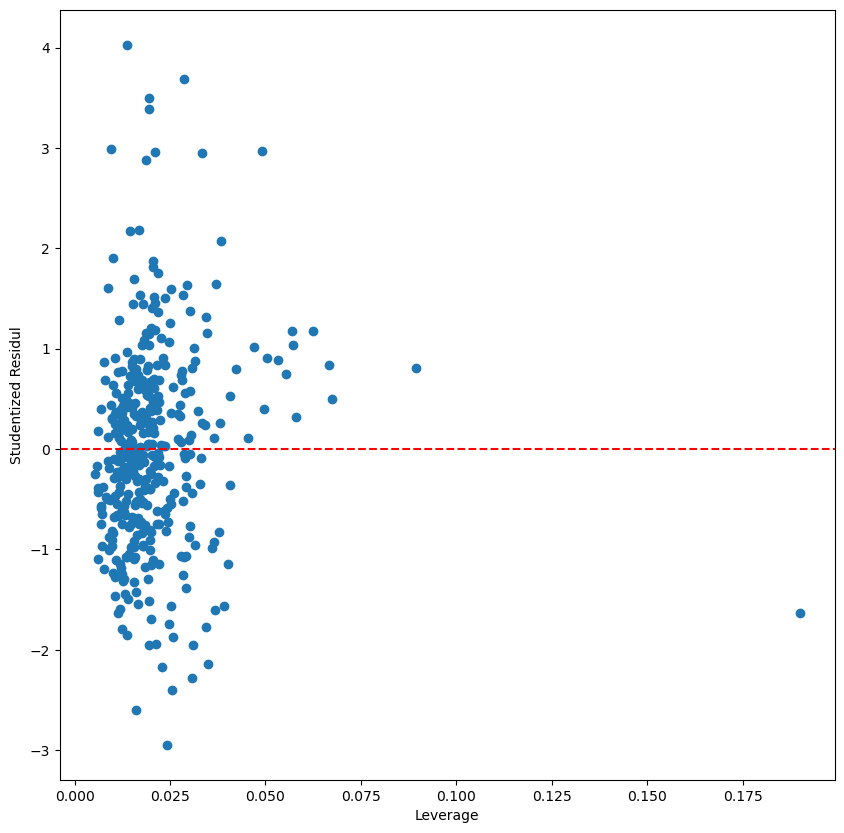

In [19]:
infl = results.get_influence()
leverage = infl.hat_matrix_diag
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(leverage, studentized_resid)
ax.axhline(0, color='red', ls='--')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residul')
infl.hat_matrix_diag.argmax()

We can see that obeservation 13 has a large leverage value, normal value for leverage is (p + 1) / n = 0.02.

### VIF


In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
vals = [VIF(X, i) for i in range(1, X.shape[1])]
vif = pd.Series(vals, name='vif', index=X.columns[1:])
vif

cylinders       10.737535
displacement    21.836792
horsepower       9.943693
weight          10.831260
acceleration     2.625806
year             1.244952
origin           1.772386
Name: vif, dtype: float64


(e) Fit some models with interactions as described in the lab. Do any interactions appear to be statistically significant?

### Answer:

Firstly let's use the predictors that are significant in our model

In [21]:
X.drop(['cylinders', 'horsepower', 'acceleration', 'displacement'], axis=1, inplace=True)

In [22]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     579.2
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          7.26e-143
Time:                        10:28:39   Log-Likelihood:                -1027.8
No. Observations:                 392   AIC:                             2064.
Df Residuals:                     388   BIC:                             2080.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.0459      4.001     -4.510      0.000     -25.913     -10.179
weight        -0.0060      0.000    -23.588      0.000      -0.006      -0.005
year           0.7571      0.048     15.668      0.000       0.662       0.852
origin         1.1504      0.259      4.439      0.000       0.641       1.660
==============================================================================
Omnibus:                       39.172   Durbin-Watson:                   1.275
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.003
Skew:                           0.577   Prob(JB):                     3.13e-17
Kurtosis:                       4.823   Cond. No.                     7.33e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.33e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
X['weight-year'] = X.weight * X.year
X['weight-origin'] = X.weight * X.origin
X['origin-year'] = X.origin * X.year

In [24]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     346.3
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          9.34e-152
Time:                        10:28:39   Log-Likelihood:                -997.43
No. Observations:                 392   AIC:                             2009.
Df Residuals:                     385   BIC:                             2037.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -104.5541     20.681     -5.055      0.000    -145.217     -63.891
weight            0.0245      0.005      4.683      0.000       0.014       0.035
year              1.8637      0.275      6.784      0.000       1.324       2.404
origin            4.7370      5.116      0.926      0.355      -5.322      14.796
weight-year      -0.0004    7.1e-05     -5.437      0.000      -0.001      -0.000
weight-origin    -0.0015      0.000     -3.119      0.002      -0.002      -0.001
origin-year      -0.0042      0.066     -0.064      0.949      -0.133       0.125
==============================================================================
Omnibus:                       49.825   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.809
Skew:                           0.685   Prob(JB):                     1.06e-23
Kurtosis:                       5.145   Cond. No.                     3.13e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
del X['origin-year']

In [26]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     416.7
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          4.36e-153
Time:                        10:28:39   Log-Likelihood:                -997.43
No. Observations:                 392   AIC:                             2007.
Df Residuals:                     386   BIC:                             2031.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -103.5066     12.680     -8.163      0.000    -128.437     -78.577
weight            0.0243      0.004      5.583      0.000       0.016       0.033
year              1.8500      0.172     10.749      0.000       1.512       2.188
origin            4.4170      1.142      3.868      0.000       2.172       6.662
weight-year      -0.0004   5.98e-05     -6.422      0.000      -0.001      -0.000
weight-origin    -0.0015      0.000     -3.136      0.002      -0.002      -0.001
==============================================================================
Omnibus:                       49.772   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.606
Skew:                           0.684   Prob(JB):                     1.17e-23
Kurtosis:                       5.143   Cond. No.                     1.89e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By evaluating the p-value of each interaction we assume that wight-year and weight-origin have significant impact on target variable.

(f) Try a few different transformations of the variables, such as log(X), X ** 0.5, X ** 2. Comment on your findings.

In [27]:
X['weight'] = X.weight ** 2
X['year'] = X.year ** 2
X['origin'] = X.origin ** 2

In [28]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     478.0
Date:                Sun, 18 Aug 2024   Prob (F-statistic):          7.08e-163
Time:                        10:28:39   Log-Likelihood:                -974.51
No. Observations:                 392   AIC:                             1961.
Df Residuals:                     386   BIC:                             1985.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.6883      1.781      1.509      0.132      -0.814       6.191
weight         1.972e-06   2.02e-07      9.761      0.000    1.57e-06    2.37e-06
year              0.0103      0.000     21.005      0.000       0.009       0.011
origin           -0.3490      0.220     -1.584      0.114      -0.782       0.084
weight-year      -0.0003   2.02e-05    -13.103      0.000      -0.000      -0.000
weight-origin     0.0008      0.000      2.117      0.035    5.39e-05       0.001
==============================================================================
Omnibus:                       59.203   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.712
Skew:                           0.730   Prob(JB):                     2.54e-34
Kurtosis:                       5.709   Cond. No.                     1.33e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

By transforming our variables to degree 2 polynomials we can see that both the f-statistics and R-squared is slightly improved. Note that since we included the interaction terms we can exclude origin variable even with a high p-value.

---

## Exercise 3.10:

This question should be answered using the Carseats data set.

(a) Fit a multiple regression model to predict Sales using Price, Urban, and US.


In [29]:
carseats_df = pd.read_csv('data/Carseats.csv')
X = carseats_df[['Price', 'Urban', 'US']]
X = sm.add_constant(X)
y = carseats_df.loc[:, 'Sales']

In [30]:
X = pd.get_dummies(X, columns=['Urban', 'US'], drop_first=True).astype('float')

In [31]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.39e-23
Time:                        10:28:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0435      0.651     20.036      0.000      11.764      14.323
Price         -0.0545      0.005    -10.389      0.000      -0.065      -0.044
Urban_Yes     -0.0219      0.272     -0.081      0.936      -0.556       0.512
US_Yes         1.2006      0.259      4.635      0.000       0.691       1.710
==============================================================================
Omnibus:                        0.676   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.713   Jarque-Bera (JB):                0.758
Skew:                           0.093   Prob(JB):                        0.684
Kurtosis:                       2.897   Cond. No.                         628.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Provide an interpretation of each coefficient in the model. Be careful—some of the variables in the model are qualitative!

Based on the multivariate regression model, Price and US variables have significantly related with Sales of child car seats at each location. Increasing one unit of price that company charges for each car seat can decrease sales for 0.05 unit and if the store is located in the US can also increase sales for 1.2 unites.

(c) Write out the model in equation form, being careful to handle the qualitative variables properly.

In [32]:
sales = -0.05 * X.Price + 1.2 * X.US_Yes + 13.04

(d) For which of the predictors can you reject the null hypothesis H0 :βj =0?

For predictor Urban or Rural location of stores with a high value of p-value, we can say that it does not have a statistically meaningful impact on Sales, meaning we accept teh null hypothesis. However, other two predictors have p-value of near zero and the null hypothesis is rejected.

(e) On the basis of your response to the previous question, fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

In [33]:
X.drop(axis=0, columns='Urban_Yes', inplace=True)

In [34]:
model = sm.OLS(y, X)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Sun, 18 Aug 2024   Prob (F-statistic):           2.66e-24
Time:                        10:28:39   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0308      0.631     20.652      0.000      11.790      14.271
Price         -0.0545      0.005    -10.416      0.000      -0.065      -0.044
US_Yes         1.1996      0.258      4.641      0.000       0.692       1.708
==============================================================================
Omnibus:                        0.666   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.717   Jarque-Bera (JB):                0.749
Skew:                           0.092   Prob(JB):                        0.688
Kurtosis:                       2.895   Cond. No.                         607.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(f) How well do the models in (a) and (e) fit the data?

Both models f-statistics p-value is close to zero but the R-Squared measure is not so high. This means that predictors and response variable might have non-linear relationship.

(g) Using the model from (e), obtain 95% confidence intervals for the coefficient(s).

In [35]:
results.conf_int(alpha=0.05, cols=None)

,0,1
const,11.79032,14.271265
Price,-0.06476,-0.044195
US_Yes,0.69152,1.707766


(h) Is there evidence of outliers or high leverage observations in the model from (e)?

Text(0, 0.5, 'Studentized Residul')

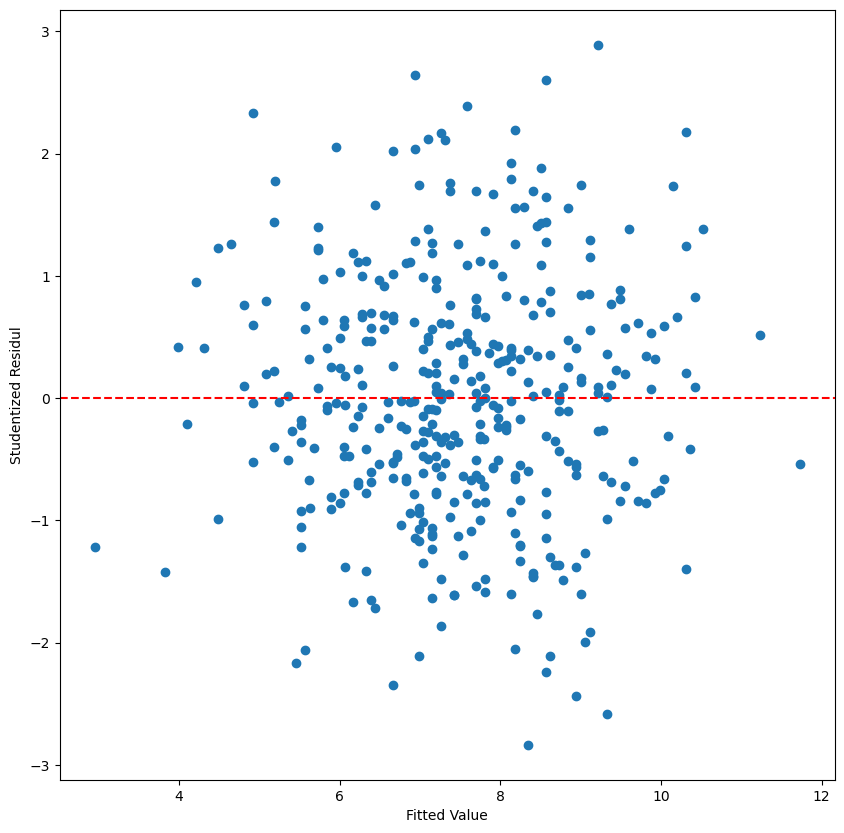

In [36]:
fig, ax = plt.subplots(figsize=(10, 10))
studentized_resid = results.outlier_test().iloc[:, 0]
ax.scatter(results.fittedvalues, studentized_resid)
ax.axhline(0, color='red', ls='--')
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Studentized Residul')

42

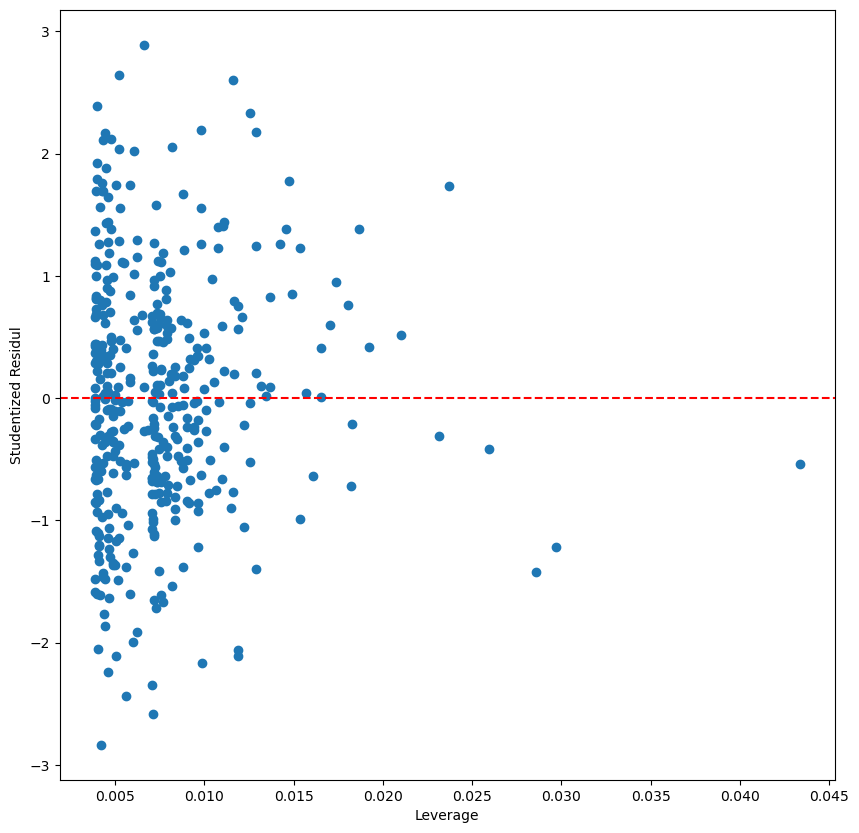

In [37]:
infl = results.get_influence()
leverage = infl.hat_matrix_diag
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(leverage, studentized_resid)
ax.axhline(0, color='red', ls='--')
ax.set_xlabel('Leverage')
ax.set_ylabel('Studentized Residul')
infl.hat_matrix_diag.argmax()

Since all the studentized residuals are between -3 and 3 there is no outlier. But assessing the leverage statistics, we can see that there are some data points with high leverage ( higher than (2+1)/400 = 0.0075 ). Extremely, fitted value number 42 has the highest value of leverage statistics.

---

## Exercise 3.11:

In this problem we will investigate the t-statistic for the null hypothesis H0 : β = 0 in simple linear regression without an intercept. To begin, we generate a predictor x and a response y as follows.

In [38]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = 2 * x + rng.normal(size=100)

(a) Perform a simple linear regression of y onto x, without an intercept. Report the coefficient estimate β, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis H0 : β = 0. Comment on these results. (You can perform regression without an intercept using the keywords argument intercept=False to ModelSpec().)

In [39]:
model = sm.OLS(y, x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 18 Aug 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:28:40   Log-Likelihood:                         -141.35
No. Observations:                 100   AIC:                                      284.7
Df Residuals:                      99   BIC:                                      287.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9762      0.117     16.898      0.000       1.744       2.208
==============================================================================
Omnibus:                        1.376   Durbin-Watson:                   2.184
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.847
Skew:                           0.121   Prob(JB):                        0.655
Kurtosis:                       3.381   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the results of linear regression, from the R-squared we assume that 74 percent of the response variable is explained from the predictor. From calculated p-value and t-statistics we can reject the null hypothesis and meaning the coefficient of the variable is not zero. One unit change in y make x to change for 1.9 unit.

(b) Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis H0 : β = 0. Comment on these results.

In [40]:
model = sm.OLS(x, y)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.743
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              285.6
Date:                Sun, 18 Aug 2024   Prob (F-statistic):                    6.23e-31
Time:                        10:28:40   Log-Likelihood:                         -58.349
No. Observations:                 100   AIC:                                      118.7
Df Residuals:                      99   BIC:                                      121.3
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3757      0.022     16.898      0.000       0.332       0.420
==============================================================================
Omnibus:                       13.156   Durbin-Watson:                   2.034
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               22.596
Skew:                          -0.528   Prob(JB):                     1.24e-05
Kurtosis:                       5.075   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

we can see that only coefficient and standard error changes as it is expected. a unit change in x will increase y for 0.37 units.

(c) What is the relationship between the results obtained in (a) and (b)?

When two variable have a statistically meaningful relationship, the p-value and t-statistic of regression on each other does not change when regressing one is the target. However, coefficient and standard error have the same unit as the predictor so varying them will be expected when the target and response change their places.

(d) For the regression of Y onto X without an intercept, the t- statistic for H0 : β = 0 takes the form βˆ/SE(βˆ), where βˆ is given by (3.38), and where

![alt text](<Screenshot 2024-08-16 at 16.18.22.png>)

(These formulas are slightly different from those given in Sections 3.1.1 and 3.1.2, since here we are performing regression without an intercept.) Show algebraically, and confirm numerically in R, that the t-statistic can be written as

![alt text](<Screenshot 2024-08-16 at 16.20.05.png>)

Answer:

![alt text](<Screenshot 2024-08-18 at 10.19.30.png>)

![alt text](<Screenshot 2024-08-18 at 10.22.50.png>)

In [54]:
np.sqrt(len(x)-1) * np.sum(x * y) / np.sqrt((np.sum(x ** 2) * np.sum(y ** 2))- (np.sum(x * y) ** 2))

16.898417063035094

We observe that the t statistics is the same as the result of regressing y onto x.



array([ 0.38547156,  3.32729923,  0.86571914, -3.24031845,  3.93491121,
        1.7220533 , -2.48658085,  0.22903568,  2.84710131,  0.7711053 ,
       -0.60329822,  1.78439605, -2.40077359,  0.36341242, -1.41242976,
        1.81028822, -0.5954134 , -0.40780215, -3.37959211, -0.10568728,
        1.54836405, -2.35149475,  1.41596221,  3.6370517 , -5.58558962,
       -6.66796459, -1.77501203, -0.6776023 , -0.1997926 ,  0.14594031,
        6.0053988 , -2.8040602 , -1.53811738,  6.40619766,  1.76357573,
        1.14451901, -1.86184537, -5.89462518,  0.50890922, -0.79682396,
       -4.77495053, -0.59271817, -0.26931526, -2.88815689,  0.21672652,
       -0.13440792, -0.12177666, -1.09372624,  2.06366006,  1.51420414,
        1.79588751, -3.04512563,  1.1388779 , -2.40479513,  2.24693651,
       -1.588062  ,  1.5678657 ,  0.09988553, -5.88407103, -0.94326535,
        1.06187325,  0.5817107 , -3.5759193 , -3.09060808,  1.29890535,
       -0.73659128,  2.67899069,  2.48772604, -5.5387722 ,  0.63